## Visualizing data in python

In this exercise we will use the [nilearn](https://nilearn.github.io) package to visualize neuroimaging data.

In [1]:
import os
import collections
import xml.etree.ElementTree as ET

import nibabel
from nilearn import plotting
%matplotlib inline

/Users/poldrack/anaconda3/envs/py3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
FSLDIR=os.environ['FSLDIR']
print(FSLDIR)

T1img=os.path.join(FSLDIR,'data/standard/MNI152_T1_2mm_brain.nii.gz')

/Applications/fmri_progs/fsl


First, plot the anatomical image

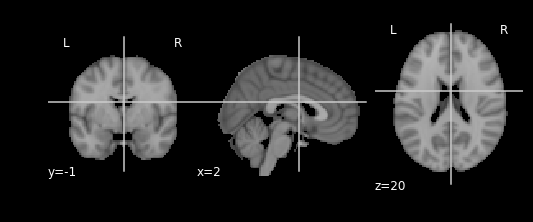

In [3]:
plotting.plot_anat(T1img)

Now plot the statistical map from our example overlaid on the anatomical image.

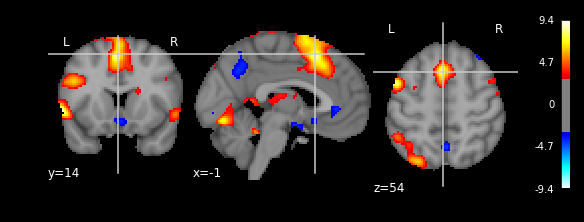

In [4]:
statmap='../data/neurovault/nv304.nii.gz'
p=plotting.plot_stat_map(statmap,bg_img=T1img,threshold=3)


# Loading FSL atlases

Now let's load the white matter atlas from FSL

/Users/poldrack/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/contour.py:920: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/Users/poldrack/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/ma/core.py:2784: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


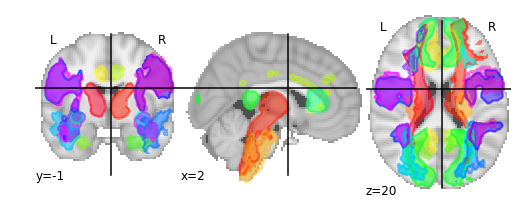

In [5]:
tractfile=os.path.join(FSLDIR,'data/atlases/JHU/JHU-ICBM-tracts-prob-2mm.nii.gz')
p=plotting.plot_prob_atlas(tractfile)


Plotting all 20 of the tracts at once is not very helpful, so let's focus in on a specific tract.  First we need to load the metadata file so that we can find out which image is associated which which tract.

In [7]:
def get_atlas_metadata(atlasfile):
    tree=ET.parse(atlasfile)
    md=collections.OrderedDict()
    for i in tree.iter():
        if 'index' in i.attrib:
            md[int(i.attrib['index'])]=i.text
    return md
            
jhu_metadata_file=os.path.join(FSLDIR,'data/atlases/JHU-tracts.xml')
jhu_md=get_atlas_metadata(jhu_metadata_file)
for i in jhu_md:
    print(i,jhu_md[i])

0 Anterior thalamic radiation L
1 Anterior thalamic radiation R
2 Corticospinal tract L
3 Corticospinal tract R
4 Cingulum (cingulate gyrus) L
5 Cingulum (cingulate gyrus) R
6 Cingulum (hippocampus) L
7 Cingulum (hippocampus) R
8 Forceps major
9 Forceps minor
10 Inferior fronto-occipital fasciculus L
11 Inferior fronto-occipital fasciculus R
12 Inferior longitudinal fasciculus L
13 Inferior longitudinal fasciculus R
14 Superior longitudinal fasciculus L
15 Superior longitudinal fasciculus R
16 Uncinate fasciculus L
17 Uncinate fasciculus R
18 Superior longitudinal fasciculus (temporal part) L
19 Superior longitudinal fasciculus (temporal part) R


Now let's loop through and display each of these tracts using a "glass brain" projection

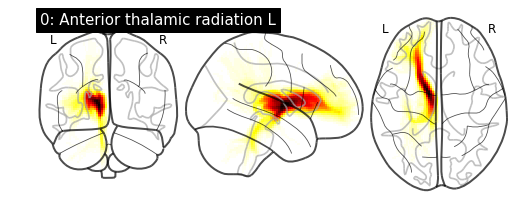

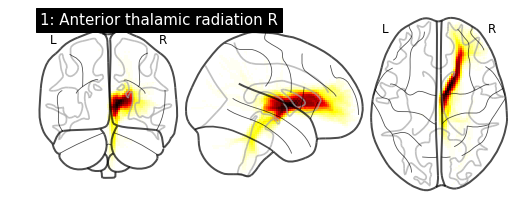

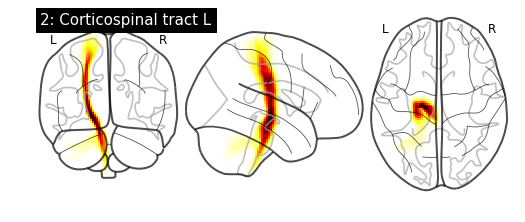

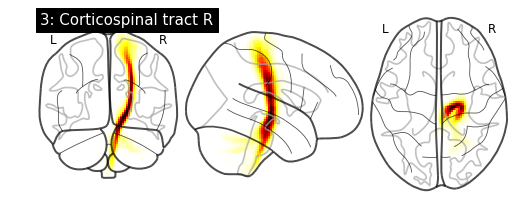

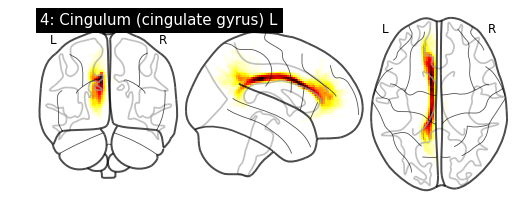

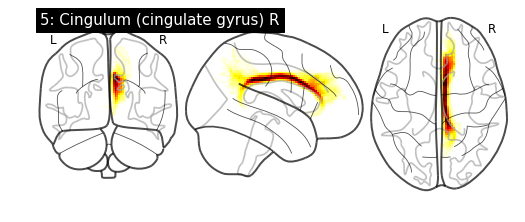

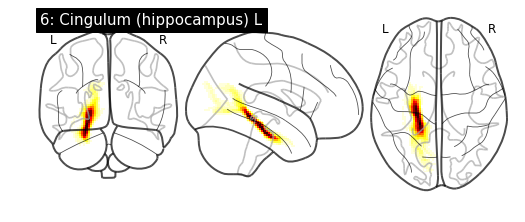

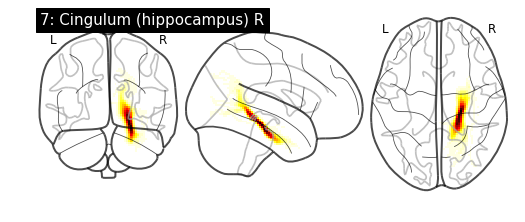

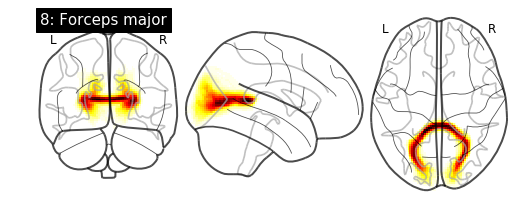

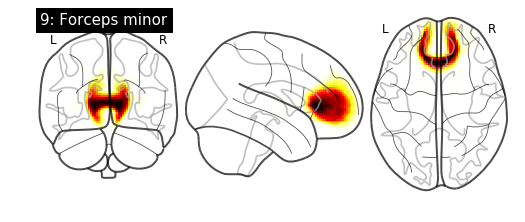

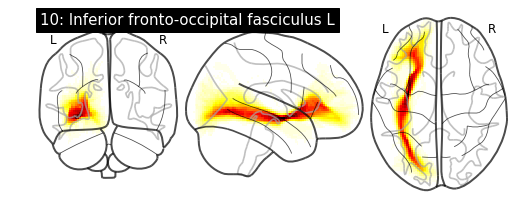

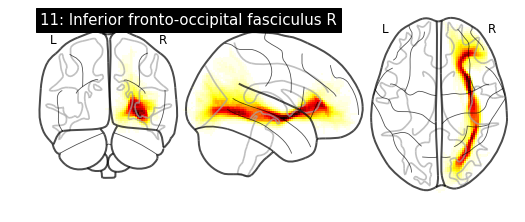

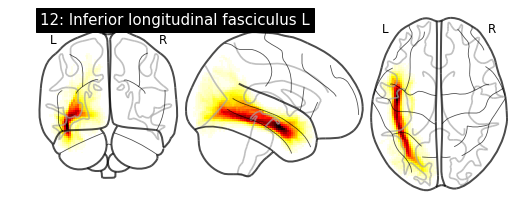

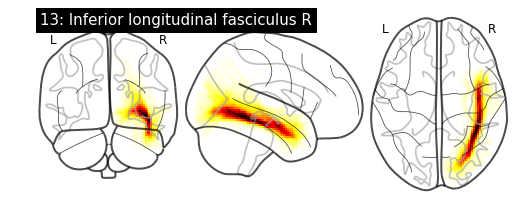

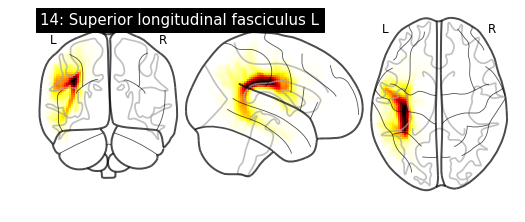

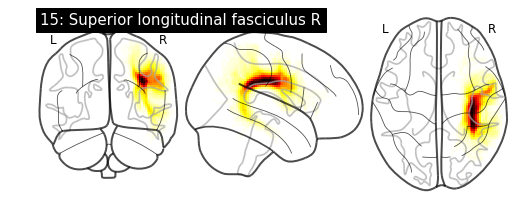

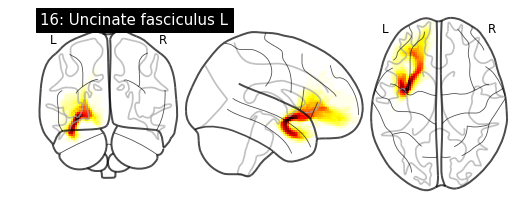

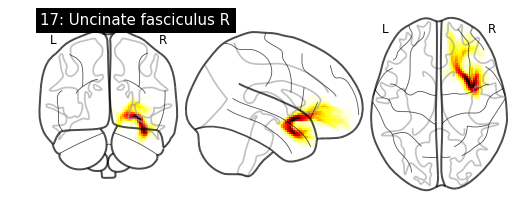

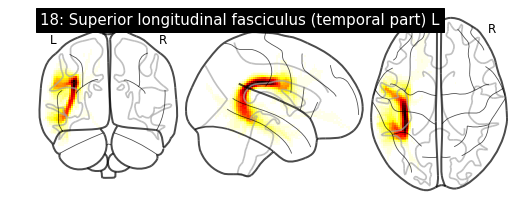

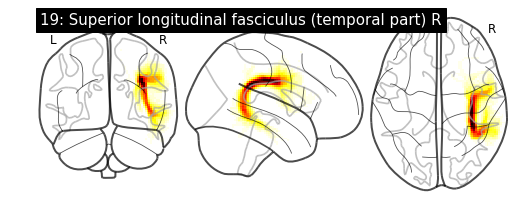

In [8]:
tractimg=nibabel.load(tractfile)
tractdata=tractimg.get_data()
for i in jhu_md:
    # create temporary 3d image for each tract
    td=tractdata[:,:,:,i]
    ti=nibabel.Nifti1Image(td,affine=tractimg.affine)
    plotting.plot_glass_brain(ti,title='%d: %s'%(i,jhu_md[i]))
    